# Module 4: Lab-4-02 Bivariate analysis - 2 qualitative variables


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 1


The file softdrinks.xlsx categorizes 250 randomly 
selected consumers on the basis of their gender, their 
age, and their preference for our brand or a competitor's brand of a low-calorie soft drink. Use a chi-square test for independence to see whether the drink 
preference is independent of gender, and then whether 
it is independent of age.  First make a plot

Results of the main calculations:
- age vs preference
  - χ² ≈ 3.8589  
  - p-value = 0.2771
  - We do not reject H0


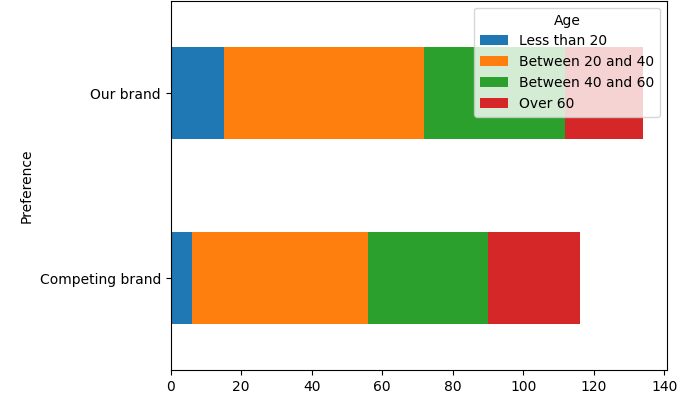



- gender vs preference
  - χ² ≈ 1.4078 
  - p-value = 0.2354
  - We do not reject H0

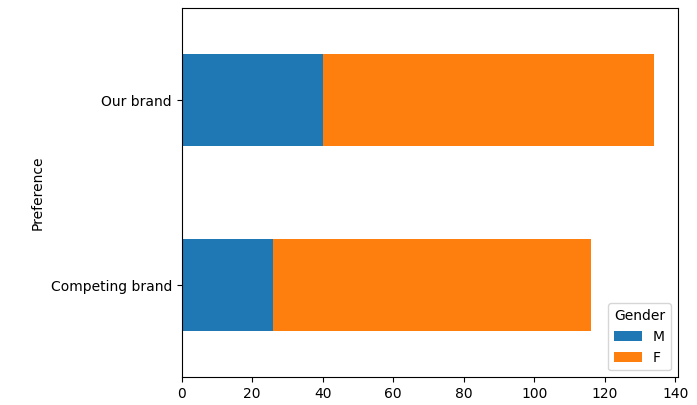

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Softdrinks.csv', sep=";")
df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


### Age vs Brand

<Axes: ylabel='Preference'>

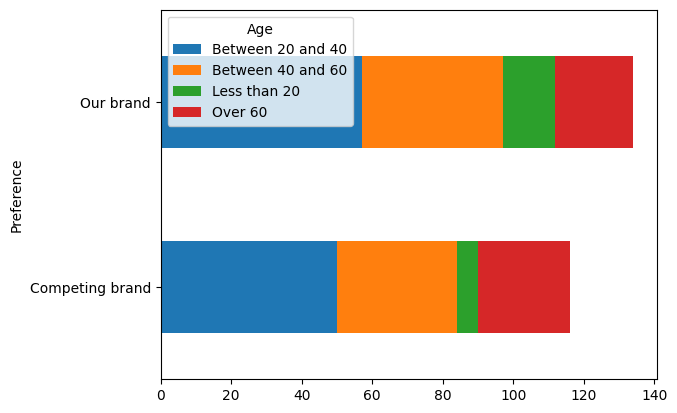

In [3]:
observed = pd.crosstab(df['Preference'],df['Age'])
observed.plot(kind='barh',stacked=True)


In [4]:
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')

Preference
Competing brand    116
Our brand          134
dtype: int64
Age
Between 20 and 40    107
Between 40 and 60     74
Less than 20          21
Over 60               48
dtype: int64
Number of observations: 250


In [5]:

chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 3.8589
Degrees of freedom: 3
P-value           : 0.2771


### Gender vs Brand

In [6]:
observed3 = pd.crosstab(df['Gender'], df['Preference'])
observed3

TypeError: 'int' object is not subscriptable

In [ ]:

chi2, p, df, expected = stats.chi2_contingency(observed3)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 1.4078
Degrees of freedom: 1
P-value           : 0.2354


## Exercise 2

The file NBA.csv contains annual salaries for all NBA basketball players in the season (2008–2009), check whether there is independence between position and salary. To do this, first change any hyphenated position such as C-F to 
the first listed, in this case C. (Presumably, this is 
the player's primary position.)     
Then remove $ and . in Annual Salary and make Annual Salary categorical with four categories: the first is all salaries below the first quartile, the second is all salaries from the first quartile to the median, and so on.  
First make a plot

Results of the main calculations:
  - χ² ≈ 3.0344 
  - p-value = 0.8045
  - We do not reject H0


  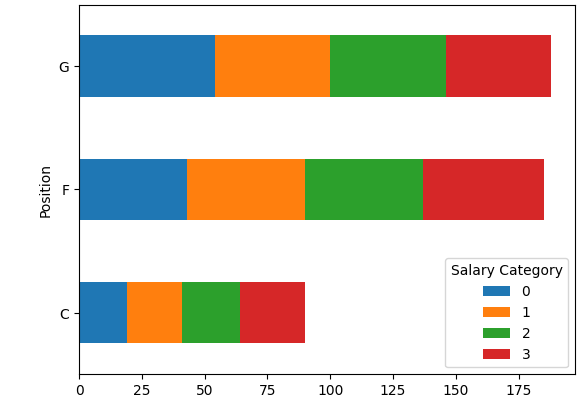

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/NBA.csv', sep=";")
df.head(10)

,Player,Team,Position,Annual Salary,Contract Yrs,Contract Amt,Contract Thru
0,"Bibby, Mike",Atlanta Hawks,G,$14.983.603,1,$14.983.603,2008-09
1,"Johnson, Joe",Atlanta Hawks,G,$14.232.566,5,$70.000.000,2009-10
2,"Smith, Josh",Atlanta Hawks,F,$10.000.000,5,$58.000.000,2012-13
3,"Claxton, Speedy",Atlanta Hawks,G,$5.757.818,4,$25.000.000,2010-11
4,"Williams, Marvin",Atlanta Hawks,F,$5.636.142,4,$18.160.000,2008-09(t)
5,"Horford, Al",Atlanta Hawks,C-F,$4.023.720,3,$12.080.160,2009-10
6,"Pachulia, Zaza",Atlanta Hawks,C,$4.000.000,4,$16.000.000,2008-09
7,"Evans, Maurice",Atlanta Hawks,F-G,$2.500.000,3,$7.500.000,2010-11
8,"Law, Acie",Atlanta Hawks,G,$2.071.680,3,$6.214.920,2009-10
9,"Murray, Ronald",Atlanta Hawks,G,$1.500.000,1,$1.500.000,2008-09


In [ ]:
df["Position"] = df["Position"].str.split("-").str[0]

df["Annual Salary"] = df["Annual Salary"].str.replace("[$.,]", "", regex=True).astype(float)

quartiles = df["Annual Salary"].quantile([0, 0.25, 0.5, 0.75, 1.0])
categories = pd.cut(df["Annual Salary"], bins=quartiles, labels=["0", "1", "2", "3"], include_lowest=True)
df["Salary Category"] = categories


In [ ]:
observed = pd.crosstab(df['Position'], df['Salary Category'])


<Axes: ylabel='Position'>

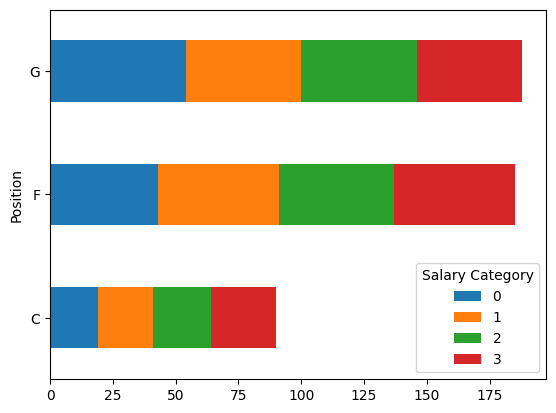

In [ ]:
observed.plot(kind='barh',stacked=True)

In [ ]:

chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)
#hier is het een beetje fout ma idk waarom

Chi-squared       : 3.0774
Degrees of freedom: 6
P-value           : 0.7991


## Exercise 3

African Americans in a St. Louis suburb sued the city 
claiming they were discriminated against in schoolteacher hiring. Of the city's population, 5.7% were 
African American; of 405 teachers in the school system, 15 were African American. Set up appropriate 
hypotheses and determine whether African Americans 
are underrepresented.  
Calculate the standardized residuals. 

Results of the main calculations:
- Chi-squared        χ² = 3.0027
- Critical value      g = 3.8415
- p-value             p = 0.0831
- standardized residuals for african american = -1.78328 > - 2

In [ ]:
types = ["African American", "Other"]
observed = np.array([15, 405 - 15])
expected_p = np.array([0.057 , (1 - 0.057)])
alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 405
k = 2; df = 1
Chi-squared        χ² = 3.0027
Critical value      g = 3.8415
p-value             p = 0.0831


In [ ]:

numb = 15/405*100
numb

3.7037037037037033

In [ ]:
p = stats.chi2.sf(numb +5.7 ,df=1)
p

0.002165475643480405

## Exercise 4
Callaway is thinking about entering the golf ball market. The company will make a profit if its market share 
is more than 20%. A market survey indicates that 140
of 624 golf ball purchasers will buy a Callaway golf 
ball.
a. Is this enough evidence to persuade Callaway to 
enter the golf ball market?

Results of the main calculations
- χ² = 2.3141
- p-value  p = 0.1282

In [ ]:
types =               ['callaway', 'other']
observed =   np.array([   140,      484])
expected_p = np.array([   .20,     .80])

alpha = 0.05               # Significance level
n = 624          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 624
k = 2; df = 1
Chi-squared        χ² = 2.3141
Critical value      g = 3.8415
p-value             p = 0.1282
